**Polynomial Linear Regression - Sklearn (Visualization)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, explained_variance_score

**Load Dataset**

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

In [3]:
print(X[:5])
print(y[:5])

[[-0.80763009]
 [ 1.67144848]
 [-0.06242907]
 [-1.53757147]
 [-2.63417243]]
[[3.40393819]
 [5.7630965 ]
 [2.126626  ]
 [3.89683006]
 [3.25891939]]


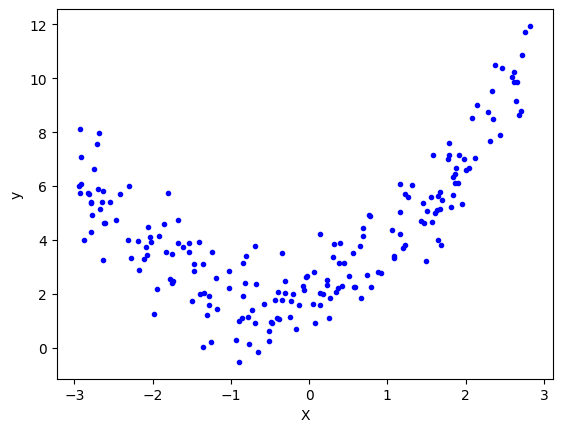

In [4]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((160, 1), (40, 1), (160, 1), (40, 1))

In [6]:
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
print(y_pred)

[[5.22495273]
 [4.34084238]
 [3.74952515]
 [5.43814377]
 [3.44795654]
 [3.34762145]
 [4.65990403]
 [4.06487444]
 [4.92591428]
 [3.9418192 ]
 [3.00917861]
 [5.29011937]
 [5.29950954]
 [6.00156222]
 [2.60299126]
 [4.21728785]
 [3.17149597]
 [3.3066465 ]
 [2.62273682]
 [2.97226986]
 [4.34274244]
 [3.62768791]
 [4.59976697]
 [5.72256709]
 [2.45545114]
 [2.76808944]
 [2.97990474]
 [5.90842104]
 [3.7039321 ]
 [4.17552514]
 [5.92838353]
 [5.4315088 ]
 [5.5829437 ]
 [5.38884832]
 [5.18693023]
 [2.64417187]
 [4.57302075]
 [4.61287925]
 [3.62148024]
 [5.01201002]]


In [8]:
print(lr.coef_)
print(lr.intercept_)

[[0.61732437]]
[4.25582684]


In [9]:
r2_score(y_test,y_pred)

0.22058341825089223

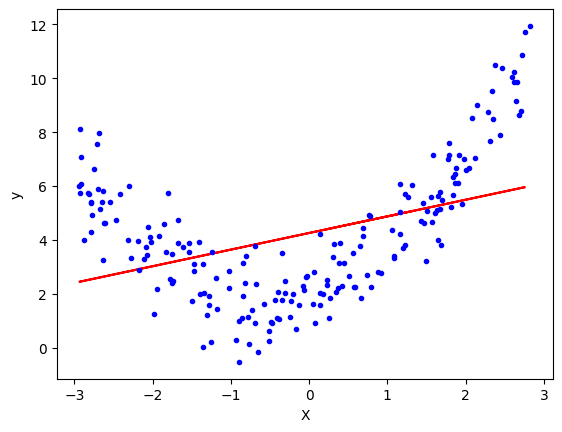

In [10]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

###**Applying Polynomial Linear Regression - Degree 2**

In [11]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [12]:
print(X_train[0])
print(X_train_trans[0])

[1.31850528]
[1.         1.31850528 1.73845617]


####**include_bias parameter**

In [13]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test_trans)
print(y_pred)

[[ 5.46462341]
 [ 2.16579479]
 [ 1.82302642]
 [ 6.75978453]
 [ 2.22337992]
 [ 2.44271769]
 [ 2.97119397]
 [ 1.81993308]
 [ 3.9751196 ]
 [ 1.7705955 ]
 [ 3.49977603]
 [ 5.83991376]
 [ 5.89548657]
 [11.11725633]
 [ 5.41448586]
 [ 1.97072334]
 [ 2.93174474]
 [ 2.54465911]
 [ 5.30510905]
 [ 3.64464527]
 [ 2.16930384]
 [ 1.93799897]
 [ 2.78613133]
 [ 8.79001064]
 [ 6.28447724]
 [ 4.55121475]
 [ 3.61420045]
 [10.30334031]
 [ 1.8586253 ]
 [ 1.9195346 ]
 [10.47466255]
 [ 6.71654882]
 [ 7.75018745]
 [ 6.44305106]
 [ 5.25403509]
 [ 5.18825904]
 [ 2.70878763]
 [ 2.82516528]
 [ 1.94555474]
 [ 4.36479955]]


In [15]:
r2_score(y_test,y_pred)

0.8728122731618481

In [16]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91336414 0.81402196]]
[2.02457126]


In [17]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

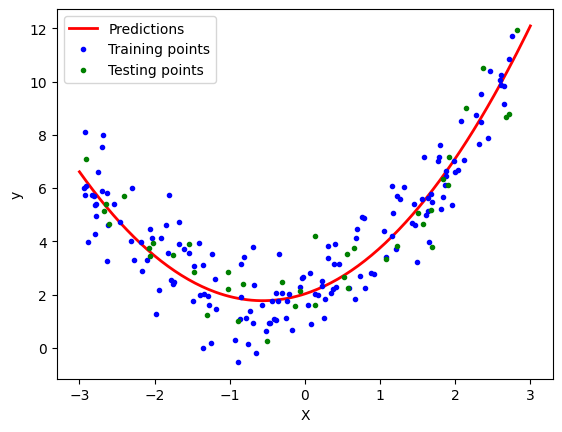

In [18]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

###**Polynomial Regression - Any Degree(350)**

In [19]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1069: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


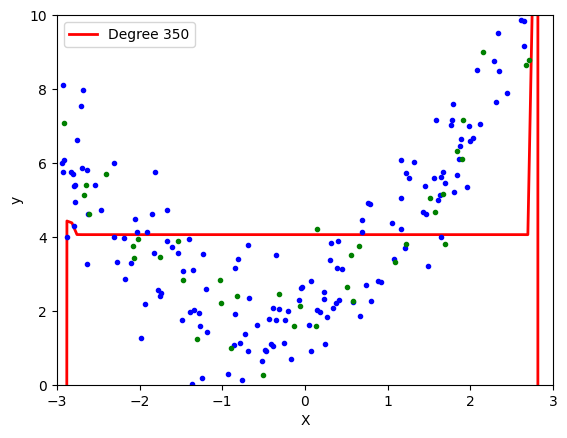

In [20]:
polynomial_regression(350)

In [21]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


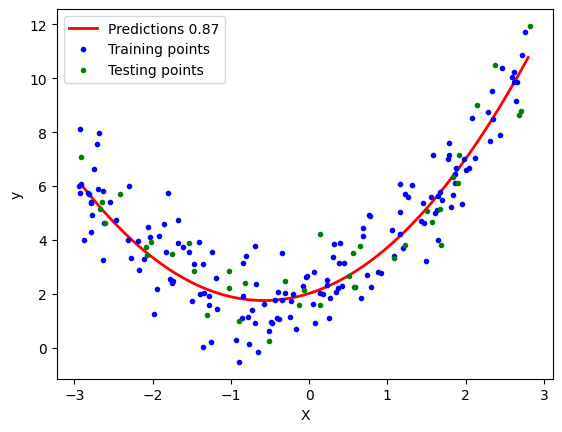

In [22]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

###**3D Polynomial Regression**

In [23]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [24]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()